# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

# **Load Dataset**

In [ ]:
file_path = '/content/netflix_titles.csv'
data = pd.read_csv(file_path)

# **Data Preprocessing**

In [ ]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['date_added'].fillna('Unknown', inplace=True)
data['rating'].fillna('Not Rated', inplace=True)
data['duration'].fillna('Unknown', inplace=True)


data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


data['duration_numeric'] = data['duration'].str.extract('(\d+)').astype(float)


print(data.info())
print(data.head())

<ipython-input-3-c15800363878>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unknown', inplace=True)
<ipython-input-3-c15800363878>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_numeric  8804 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB

# **Exploratory Data Analysis (EDA)**

<ipython-input-4-12d33500fc5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='viridis')


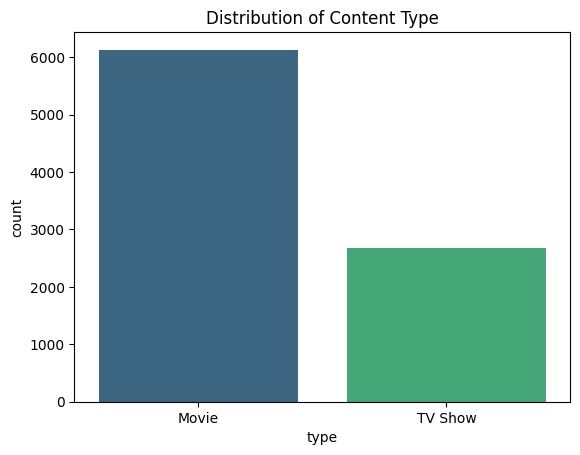

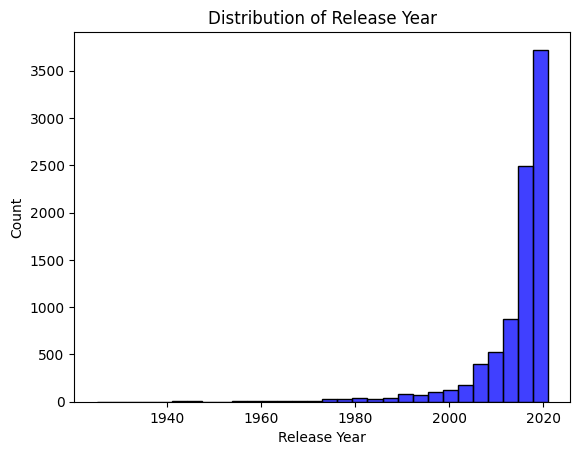

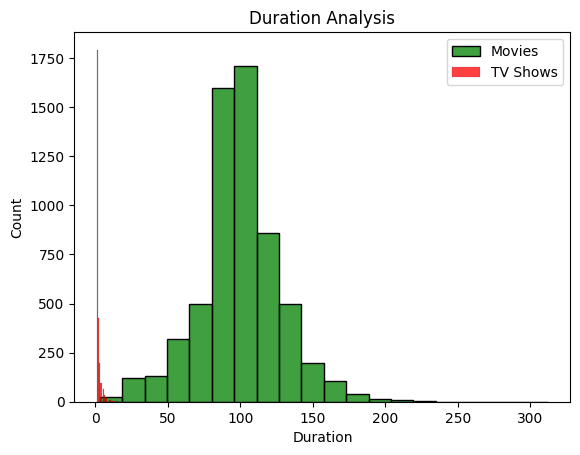

In [ ]:
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Distribution of Content Type')
plt.show()


sns.histplot(data['release_year'], kde=False, bins=30, color='blue')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

sns.histplot(movies['duration_numeric'].dropna(), bins=20, color='green', label='Movies')
sns.histplot(tv_shows['duration_numeric'].dropna(), bins=20, color='red', label='TV Shows')
plt.legend()
plt.title('Duration Analysis')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

# **Feature Selection**

In [ ]:
X = data[['release_year', 'duration_numeric']]
X.fillna(0, inplace=True)
y = data['type'].map({'Movie': 0, 'TV Show': 1})


selector = SelectKBest(chi2, k=2)
X_selected = selector.fit_transform(X, y)
print('Selected Features:', selector.get_support(indices=True))

Selected Features: [0 1]


<ipython-input-5-5bc2757e9d93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


# **Modeling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save model for future use
import joblib
joblib.dump(model, '/content/random_forest_model.pkl')

['/content/random_forest_model.pkl']

# **Model Evaluation**

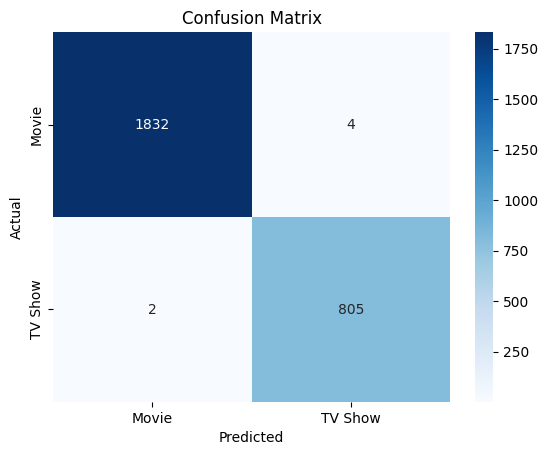

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       1.00      1.00      1.00       807

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643



In [ ]:
# Predictions and evaluation
predictions = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, predictions))

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
print(classification_report(y_test, predictions_lr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       1.00      1.00      1.00       807

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643



# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)
print(classification_report(y_test, predictions_svm))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       1.00      1.00      1.00       807

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643



# **Gradient Boosting**

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, predictions_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       0.99      1.00      1.00       807

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643



# **K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)
print(classification_report(y_test, predictions_knn))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       1.00      1.00      1.00       807

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643

